## **Next-Generation Agricultural Market Forecasting and Insights System for Kenya**

### Business Understanding
### Business Overview

Kenya’s economic stability is intrinsically linked to the performance of its agricultural sector, which serves as both a primary GDP contributor and the backbone of livelihoods for millions of households. However, the sector continues to face structural inefficiencies characterized by persistent price volatility, fragmented market coordination, information asymmetry, and sentiment-driven demand fluctuations. These systemic challenges erode income predictability for farmers and traders, constrain value chain optimization, and ultimately weaken overall market resilience. In a data-driven global economy, the absence of real-time market intelligence and forward-looking analytics represents a critical strategic gap. Addressing this gap through an integrated, predictive market insights and forecasting system presents a transformative opportunity to enhance transparency, stabilize incomes, strengthen decision-making, and drive sustainable economic impact across Kenya’s agricultural ecosystem.
Stakeholders and Their Gains
Farmers (Small-Scale & Large-Scale)
Gains:
Informed decisions on when and where to sell their produce for maximum profit.
Insights into seasonal price trends to optimize crop production cycles.
Awareness of public sentiment that may impact market demand.


### Traders & Distributors (Wholesalers & Retailers)
#### Gains:
Forecasting tools to plan optimal buying and selling times.
Reduction in losses due to unexpected price drops.
Better logistics planning by analyzing regional price variations.

### Consumers (General Public)
#### Gains:
Awareness of expected price changes for household budgeting.
More stable prices due to better market efficiency.
Potential for lower food costs as market inefficiencies decrease.

### Problem Statement
Kenya’s agricultural markets exhibit pronounced price volatility across regions and commodity categories, creating significant uncertainty for market participants. These fluctuations are driven by seasonal production cycles, shifting demand patterns, regional supply imbalances, and evolving public perception. For example, staple commodities such as maize experience substantial temporal and geographic price disparities, directly influencing farmers’ commercialization strategies and revenue outcomes. Compounding these structural inefficiencies is the growing influence of digital public sentiment, particularly on social media platforms, which increasingly shapes market expectations and short-term demand behavior. The convergence of these factors results in a complex and opaque decision-making environment, limiting stakeholders’ ability to optimize pricing, distribution, and market timing strategies.

### Objectives
### Assess Commodity Price Fluctuations
* How does the price volatility of different agricultural commodities vary across regions and over time?
* What key factors—such as seasonal variations, market demand, and other market conditions—contribute to observed price fluctuations?
### Analyze Market Trends:
* Can predictive models accurately forecast future agricultural market trends and price movements?
* How effective are predictive modeling techniques in predicting future price movements across different commodities and markets?

**DATA UNDERSTANDING**

The primary dataset contains Food Prices data for Kenya, sourced from the Kenya Agricultural Market Information System KAMIS, developed by the Ministry of Agriculture, Livestock, Fisheries, and Cooperatives. This database covers foods such as maize, rice, beans and beef, ,is updated daily(though mostly contains monthly data). The platform offers data on commodity prices, trade volumes, and market highlights

***Understanding rows and columns of our data***

In [1]:
#importing necessary libraries
import pandas as pd
import glob
import os
import warnings
import time
import numpy as np
import sys
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.statespace.sarimax import SARIMAX
import xgboost as xgb
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from pandas.tseries.offsets import MonthEnd
# importing custom scripts for different functions
sys.path.append('scripts')  # add scripts to path

import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

import warnings
warnings.filterwarnings('ignore')

import tensorflow as tf
tf.get_logger().setLevel('ERROR')


# Ignore warnings
warnings.filterwarnings("ignore")

Matplotlib is building the font cache; this may take a moment.
2026-02-24 20:43:44.085779: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2026-02-24 20:43:45.155555: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
/home/jose/anaconda3/lib/python3.13/site-packages/requests/__init__.py:113: RequestsDependencyWarning: urllib3 (2.3.0) or chardet (6.0.0.post1)/charset_normalizer (3.3.2) doesn't match a supported version!
  warnings.warn(
2026-02-24 20:43:57.449004: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.


In [2]:
# Setting the directory containing our CSV files
csv_directory = "./data/Products"  
# Using glob to match all CSV files in the directory
csv_files = glob.glob(os.path.join(csv_directory, '*.csv'))
# Initialize an empty list to hold DataFrames
data_frames = []

# Iterating over the list of CSV files
for file in csv_files:
    # Reading each CSV file into a DataFrame
    df = pd.read_csv(file)
    # Appending the DataFrame to the list
    data_frames.append(df)

# Concatenating all DataFrames in the list into a single DataFrame
combined_df = pd.concat(data_frames, ignore_index=True)

# Reading the data from the combined CSV file
data = pd.read_csv("combined.csv")
data

,Commodity,Classification,Grade,Sex,Market,Wholesale,Retail,Supply Volume,County,Date
0,Banana (Ripening),-,-,-,Mukuyu Market,-,50.00/Kg,NaN,Muranga,2026-02-11
1,Banana (Ripening),-,-,-,Mulot,70.00/Kg,100.00/Kg,1500.0,Bomet,2026-02-11
2,Banana (Ripening),-,-,-,Kitale Municipality Market,80.00/Kg,100.00/Kg,6000.0,Trans-Nzoia,2026-02-11
3,Banana (Ripening),-,-,-,Kerugoya,20.00/Kg,40.00/Kg,300.0,Kirinyaga,2026-02-10
4,Banana (Ripening),-,-,-,Bondeni,80.00/Kg,100.00/Kg,5000.0,Trans-Nzoia,2026-02-10
...,...,...,...,...,...,...,...,...,...,...
57005,Beans (Yellow-Green),-,-,-,Molo,-,250.00/Kg,40.0,Nakuru,2024-02-01
57006,Beans (Yellow-Green),-,-,-,Nyeri open air,155.56/Kg,180.00/Kg,NaN,Nyeri,2024-01-31
57007,Beans (Yellow-Green),-,-,-,Makutano Kirinyaga,116.67/Kg,130.00/Kg,1600.0,Kirinyaga,2024-01-31
57008,Beans (Yellow-Green),-,-,-,Nakuru Wakulima,140.00/Kg,-,NaN,Nakuru,2024-01-31


Checking the information of the data	to understand the number of rows and columns, data types, and missing values.

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57010 entries, 0 to 57009
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Commodity       57010 non-null  object 
 1   Classification  57010 non-null  object 
 2   Grade           57010 non-null  object 
 3   Sex             57010 non-null  object 
 4   Market          57010 non-null  object 
 5   Wholesale       57010 non-null  object 
 6   Retail          57010 non-null  object 
 7   Supply Volume   39235 non-null  float64
 8   County          56991 non-null  object 
 9   Date            57010 non-null  object 
dtypes: float64(1), object(9)
memory usage: 4.3+ MB


In [4]:
#Checking for missing values in the different columns of the data
data.isna().sum()

Commodity             0
Classification        0
Grade                 0
Sex                   0
Market                0
Wholesale             0
Retail                0
Supply Volume     17775
County               19
Date                  0
dtype: int64

Checking for number of duplicated in the data

In [5]:
data.duplicated().sum()

np.int64(4259)

Dropping duplicates from	the data to ensure data quality and accuracy in analysis.

In [6]:
data.drop_duplicates(inplace=True)
data.reset_index(drop=True, inplace=True)

Filling the null values in the county column using mode and groupby

In [7]:
data['County'] = data.groupby('Market')['County'].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else "Unknown"))

Filling the missing values in the supply volume column

In [8]:
# Computing median values for each commodity
supply_medians = data.groupby('Commodity')[['Supply Volume']].median()
print(supply_medians)

# Imputing the missing values with median
def impute_supply_median(row):
    if pd.isna(row['Supply Volume']):
        row['Supply Volume'] = supply_medians.loc[row['Commodity'], 'Supply Volume']
    return row
# Applying imputation
data = data.apply(impute_supply_median, axis=1)

                             Supply Volume
Commodity                                 
Banana (Cooking)                    1500.0
Banana (Ripening)                   1500.0
Beans (Yellow-Green)                1500.0
Beans Red Haricot (Wairimu)         1200.0
Cabbages                            3500.0
Cowpea leaves (Kunde)                300.0
Cowpeas                              850.0
Dry Maize                           5000.0
Dry Onions                          2500.0
Finger Millet                        650.0
Kales/Sukuma Wiki                    900.0
Maize Flour                         3876.0
Meat Beef                           1300.0
Omena                               1200.0
Red Irish potato                    3000.0
Red Sorghum                          650.0
Rice                                2200.0
Spinach                              460.0
Wheat                                630.0


In [9]:
#Confirming if all the null values have been filled
data.isnull().sum()

Commodity         0
Classification    0
Grade             0
Sex               0
Market            0
Wholesale         0
Retail            0
Supply Volume     0
County            0
Date              0
dtype: int64

Changing the data type of the date column to datetime

In [10]:
# Converting 'Retail' and 'Wholesale' columns to numeric, coercing errors to NaN
data['Date'] = pd.to_datetime(data['Date'])

Dropping columns that won't be used in the analysis

In [11]:
data= data.drop(columns=["Classification", "Grade", "Sex"])

In [12]:
#Checking the first few rows after cleaning the data
data.head()

,Commodity,Market,Wholesale,Retail,Supply Volume,County,Date
0,Banana (Ripening),Mukuyu Market,-,50.00/Kg,1500.0,Muranga,2026-02-11
1,Banana (Ripening),Mulot,70.00/Kg,100.00/Kg,1500.0,Bomet,2026-02-11
2,Banana (Ripening),Kitale Municipality Market,80.00/Kg,100.00/Kg,6000.0,Trans-Nzoia,2026-02-11
3,Banana (Ripening),Kerugoya,20.00/Kg,40.00/Kg,300.0,Kirinyaga,2026-02-10
4,Banana (Ripening),Bondeni,80.00/Kg,100.00/Kg,5000.0,Trans-Nzoia,2026-02-10


In [13]:
# Confirming if there is any missing value 
data.isnull().sum()

Commodity        0
Market           0
Wholesale        0
Retail           0
Supply Volume    0
County           0
Date             0
dtype: int64

Cleaning the wholesale and retail price columns by removing the commas and converting them to numeric data types

In [14]:
def clean_price(series):
	clean_series = pd.to_numeric(series.astype(str).str.replace('[^0-9.]', '', regex=True), errors='coerce')
	return clean_series

data["Wholesale"] = clean_price(data["Wholesale"])
data["Retail"] = clean_price(data["Retail"])

In [15]:
data.isnull().sum()

Commodity            0
Market               0
Wholesale        11061
Retail            2194
Supply Volume        0
County               0
Date                 0
dtype: int64

Found missing values after cleaning the price columns.
```python 
Filled the null values using 0

In [16]:
data["Wholesale"] = data["Wholesale"].fillna(0)
data["Retail"] = data["Retail"].fillna(0)
data.isnull().sum()

Commodity        0
Market           0
Wholesale        0
Retail           0
Supply Volume    0
County           0
Date             0
dtype: int64

Created a new columns 'Price argin and Margin percentage' to analyze the profitability of the commodities by calculating the difference between retail and wholesale prices and expressing it as a percentage of the wholesale price.

In [17]:
# Calculating absolute price difference
data['Price_Margin'] = data['Retail'] - data['Wholesale']
data = data[data['Wholesale'] > 0].copy()
# Calculating percentage margin, handling division by zero
data['Margin_Percentage'] = (data['Price_Margin'] / data['Wholesale']) * 100

Converting the new columns to numeric data type

In [18]:
# Converting 'Retail' and 'Wholesale' columns to numeric, coercing errors to NaN
for col in ['Retail', 'Wholesale']:
    data[col] = pd.to_numeric(data[col], errors='coerce')
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41690 entries, 1 to 52750
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Commodity          41690 non-null  object        
 1   Market             41690 non-null  object        
 2   Wholesale          41690 non-null  float64       
 3   Retail             41690 non-null  float64       
 4   Supply Volume      41690 non-null  float64       
 5   County             41690 non-null  object        
 6   Date               41690 non-null  datetime64[ns]
 7   Price_Margin       41690 non-null  float64       
 8   Margin_Percentage  41690 non-null  float64       
dtypes: datetime64[ns](1), float64(5), object(3)
memory usage: 3.2+ MB


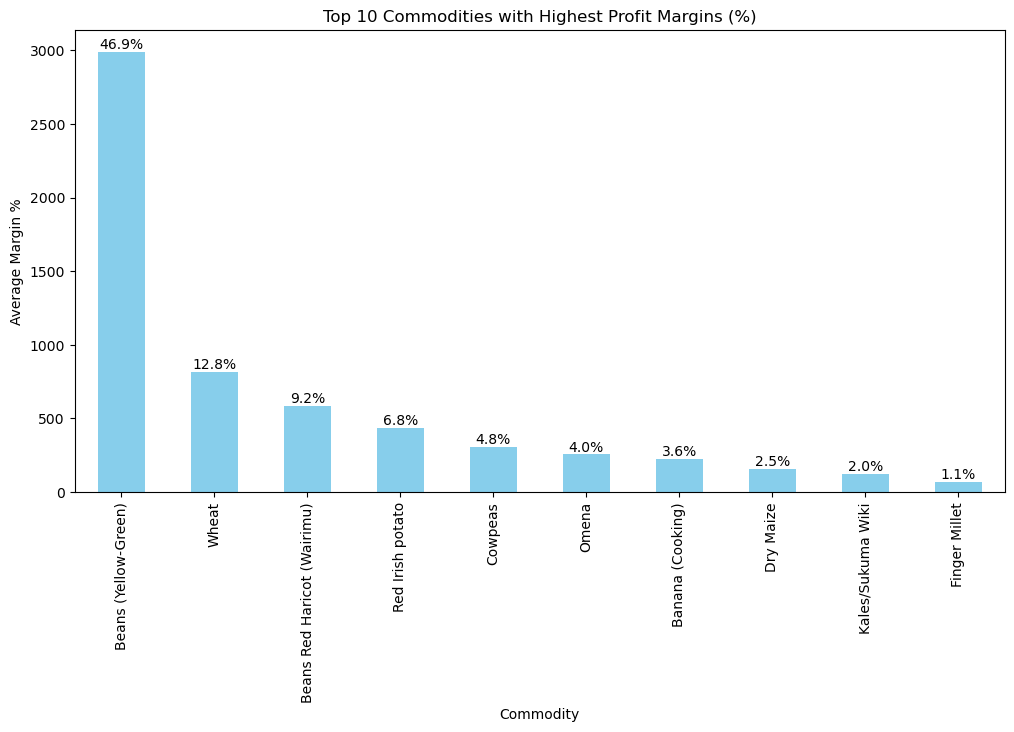

In [19]:
# Visualizing top 10 commodities by average profit margin percentage
plt.figure(figsize=(12, 6))
df1 = data.groupby('Commodity')['Margin_Percentage'].mean().sort_values(ascending=False)
df1.head(10).plot(kind='bar', color='skyblue')
plt.title('Top 10 Commodities with Highest Profit Margins (%)')
plt.ylabel('Average Margin %')
total = df1.sum()
for i, rate in enumerate(df1.head(10)):
    plt.text(
        i,
        rate,
        f"{rate/total:.1%}",
        ha='center',
        va='bottom',
        fontsize=10
    );

Beans (Yellow-Green) has the highest profit margin at 46.9%, while most other commodities have much lower margins. The next highest commodities are far behind, showing that profitability is unevenly distributed. High price does not always mean high profit, as Omena and Beef are expensive but not the most profitable.

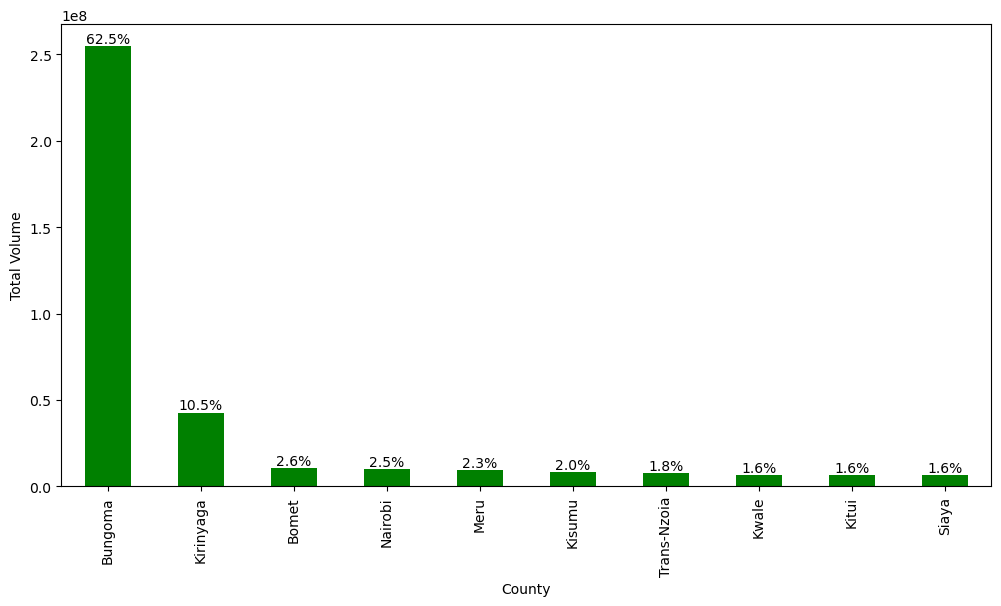

In [20]:
# Visualizing top 10 counties by total supply volume
plt.figure(figsize=(12, 6))
df2 = data.groupby('County')['Supply Volume'].sum().sort_values(ascending=False)
df2.head(10).plot(kind='bar', color='green')
plt.ylabel('Total Volume')
total = df2.sum()
for i, rate in enumerate(df2.head(10)):
    plt.text(
        i,
        rate,
        f"{rate/total:.1%}",
        ha='center',
        va='bottom',
        fontsize=10
    );

Bungoma contributes over 60% of total supply, while the second county lags far behind. Other counties have minimal shares, showing that supply is highly centralized. This creates dependency on one county, posing potential supply risks.

What are the top 10 most expensive commodities by average retail price in the market?

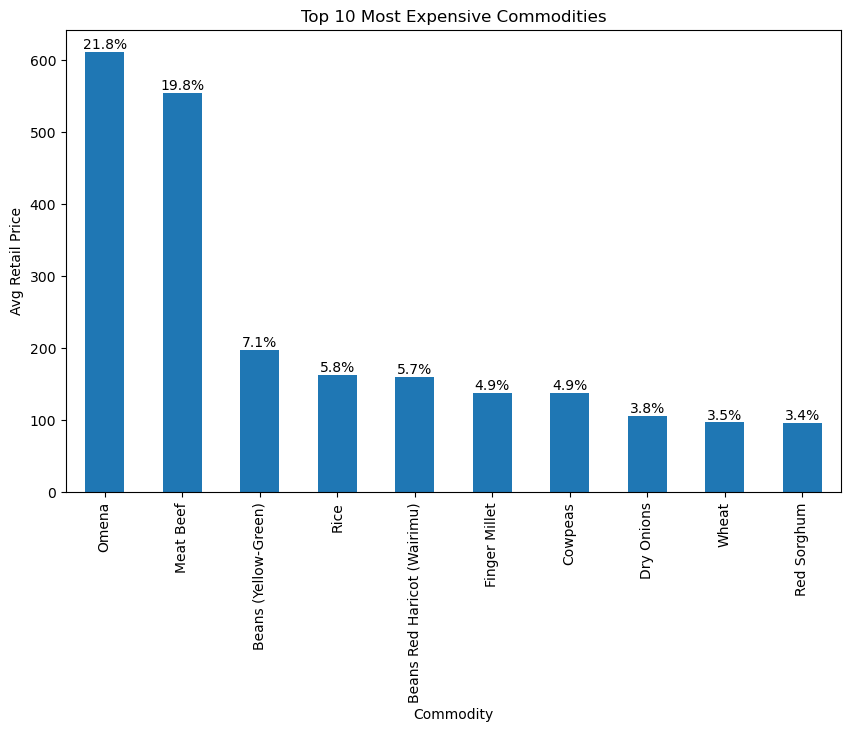

In [21]:
# Analyzing price trends for key commodities
plt.figure(figsize=(10,6))
df3 = data.groupby('Commodity')['Retail'].mean().sort_values(ascending=False)
df3.head(10).plot(kind='bar')
plt.ylabel("Avg Retail Price")
plt.title("Top 10 Most Expensive Commodities")
total = df3.sum()
for i, rate in enumerate(df3.head(10)):
    plt.text(
        i,
        rate,
        f"{rate/total:.1%}",
        ha='center',
        va='bottom',
        fontsize=10
    );

Omena is the most expensive commodity, followed by Beef. Prices drop sharply after the top two, showing that a few items dominate costs. This indicates price concentration at the top of the market.

### Is there any correlation between the features in the dataset?

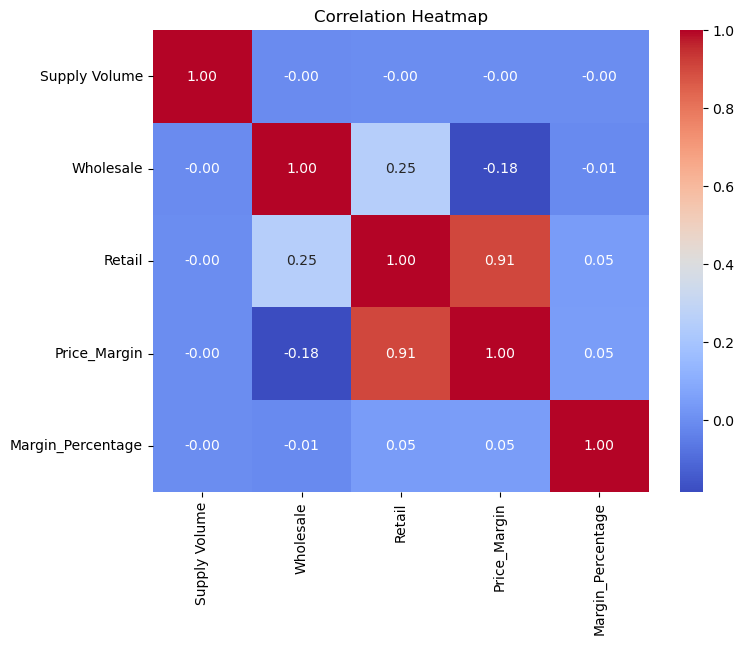

In [22]:
# Analyzing price trends for key commodities
plt.figure(figsize=(8, 6))
correlation = data[['Supply Volume', 'Wholesale', 'Retail', 'Price_Margin', 'Margin_Percentage']].corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

***Retail and Price-Margin have a very strong positive correlation of 0.91 while supply volume has 0 correlation with all the features. Wholesale and retail have a weak positive correlation of 0.25***


Interpolating the retail and wholesale collumns to fill gaps in price trends

In [23]:
# Sorting data by Date and Commodity first
data = data.sort_values(['Commodity', 'Date'])
# Using linear interpolation to fill gaps in price trends
data['Retail'] = data.groupby(['Market', 'Commodity'])['Retail'].transform(lambda x: x.interpolate(method='linear'))
data['Wholesale'] = data.groupby(['Market', 'Commodity'])['Wholesale'].transform(lambda x: x.interpolate(method='linear'))

In [24]:
# Calculating Coefficient of Variation - a measure of volatility
volatility = data.groupby(['Market', 'Commodity'])['Retail'].std() / data.groupby('Commodity')['Retail'].mean()
print("Top 5 Most Volatile Commodities (Hardest to predict):")
print(volatility.sort_values(ascending=False).head())

Top 5 Most Volatile Commodities (Hardest to predict):
Market                    Commodity                  
Lungalunga                Banana (Cooking)               61.967454
                          Dry Maize                      35.350013
Chepterit Market - Nandi  Dry Maize                      21.463823
Musoli Market             Beans Red Haricot (Wairimu)    18.775163
Nyamakima                 Wheat                          18.608361
Name: Retail, dtype: float64


Which markets that have the highest and lowest supply volume?

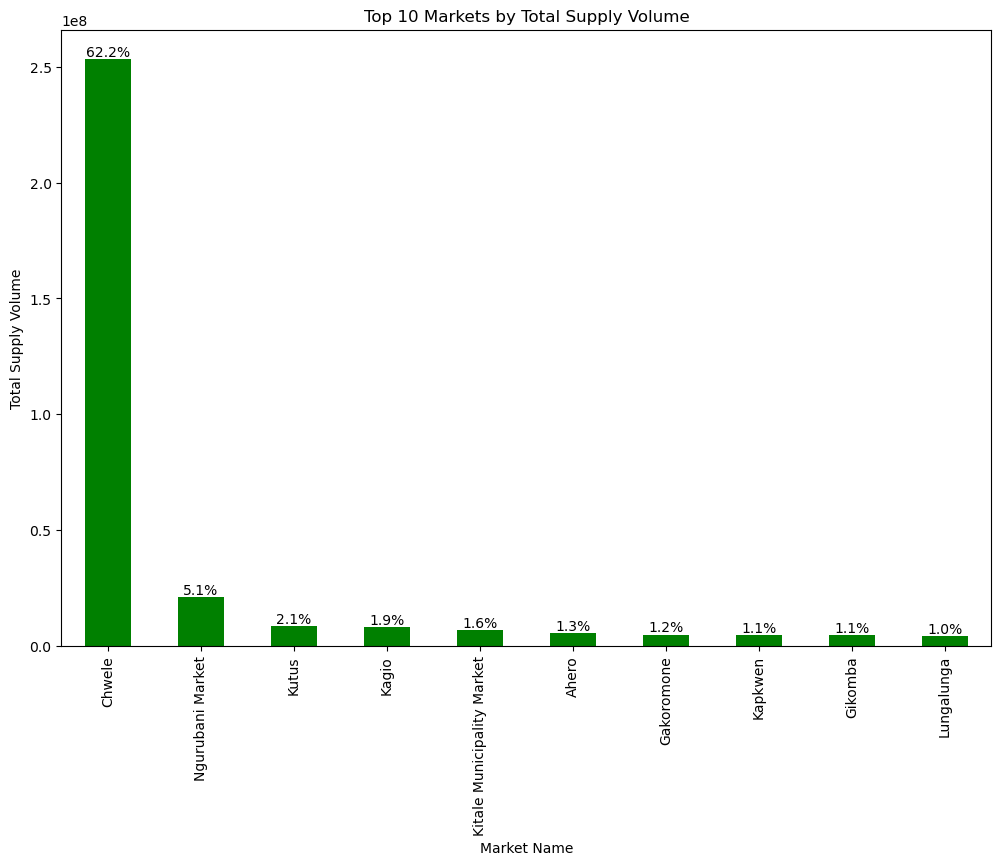

In [25]:
# Visualizing top 10 markets by total supply volume
plt.figure(figsize=(12,8))
df5 = data.groupby('Market')['Supply Volume'].sum().sort_values(ascending=False)
df5.head(10).plot(kind='bar', color='green')
plt.xlabel("Market Name")
plt.ylabel("Total Supply Volume")
plt.title('Top 10 Markets by Total Supply Volume')
total = data.groupby('Market')['Supply Volume'].sum().sum()
for i, rate in enumerate(df5.head(10)):
    plt.text(
        i,
        rate,
        f"{rate/total:.1%}",
        ha='center',
        va='bottom',
        fontsize=10
    );


Chwele leads with 62.2% of total supply, and the second market contributes just 5.1%. The remaining markets account for much less, highlighting extreme market concentration. This suggests vulnerability if Chwele’s output is disrupted.

#### Filtering the Nairobi	market data to analyze the price trends in the capital city

In [26]:
# Creating a list of markets for major cities
Nairobi_data = data[data['County'].str.contains('Nairobi', case=False, na=False)]

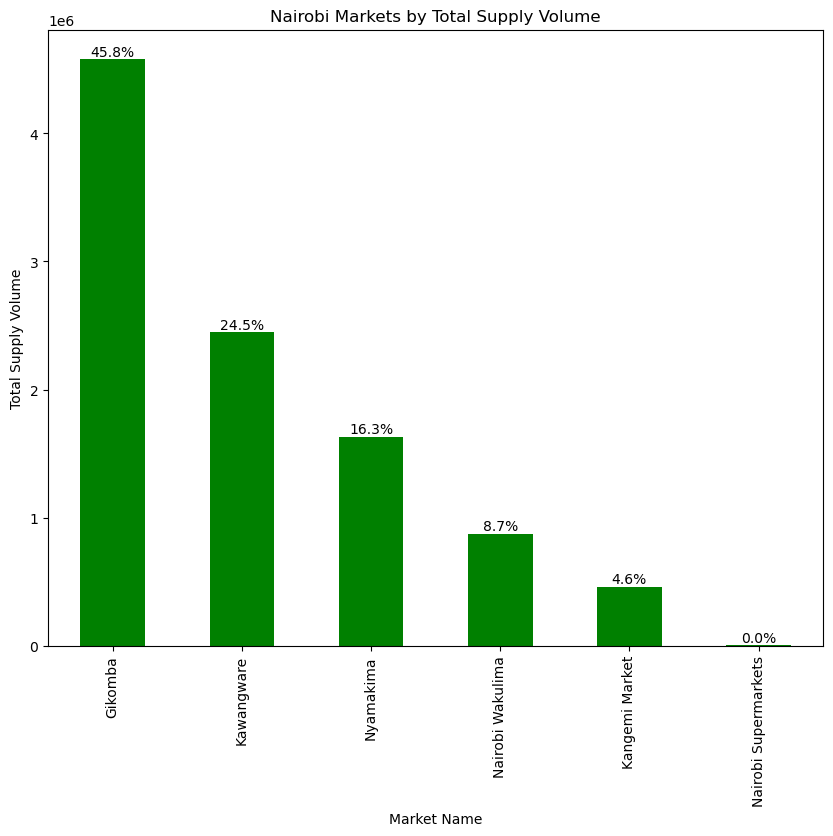

In [27]:
# Visualizing top 6 Nairobi markets by total supply volume
plt.figure(figsize=(10,8))
df6=Nairobi_data.groupby('Market')['Supply Volume'].sum().sort_values(ascending=False)
df6.head(10).plot(kind='bar', color='green')
plt.xlabel("Market Name")
plt.ylabel("Total Supply Volume")
plt.title('Nairobi Markets by Total Supply Volume')
total = Nairobi_data.groupby('Market')['Supply Volume'].sum().sum()
for i, rate in enumerate(df6.head(10)):
    plt.text(
        i,
        rate,
        f"{rate/total:.1%}",
        ha='center',
        va='bottom',
        fontsize=10
    );


Gikomba dominates Nairobi’s supply at 48.8%, followed by Kawangware at 24.5%. Other markets supply much less, showing that city distribution is concentrated in a few key markets. This makes Gikomba a critical hub for Nairobi’s food supply.

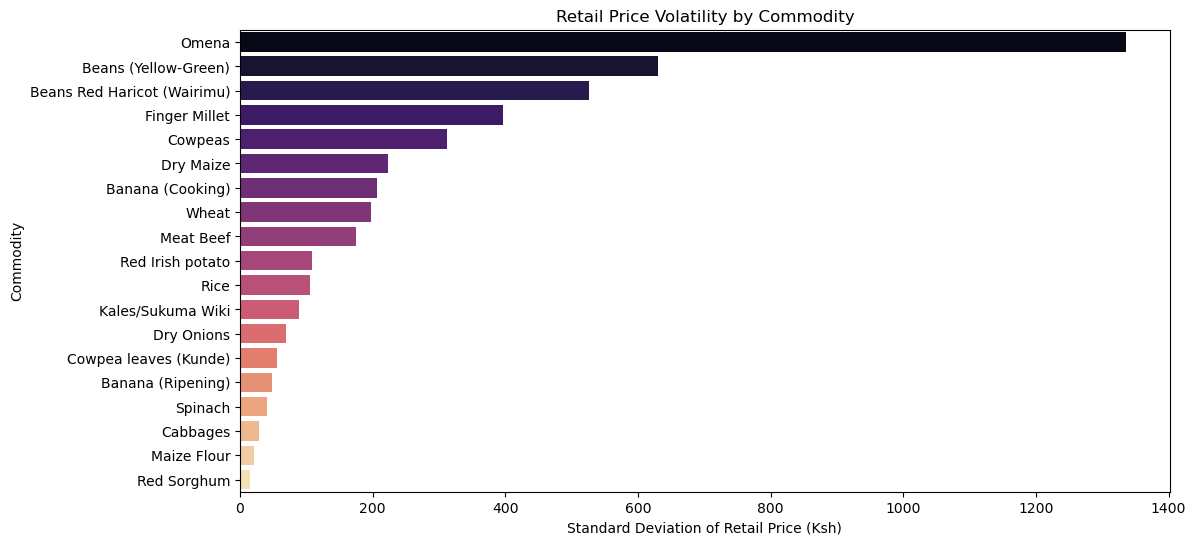

In [28]:
# Computing Volatility per Commodity 
volatility = data.groupby('Commodity')['Retail'].std().sort_values(ascending=False)

plt.figure(figsize=(12,6))
sns.barplot(x=volatility.values, y=volatility.index, palette="magma")
plt.title("Retail Price Volatility by Commodity")
plt.xlabel("Standard Deviation of Retail Price (Ksh)")
plt.ylabel("Commodity")
plt.show()

Omena has the highest price volatility, followed by Beans (Yellow-Green). These commodities experience larger fluctuations, posing risks for traders and consumers. High volatility reflects sensitivity to supply, demand, or market changes.

#### What is the trend of average retail price over time?

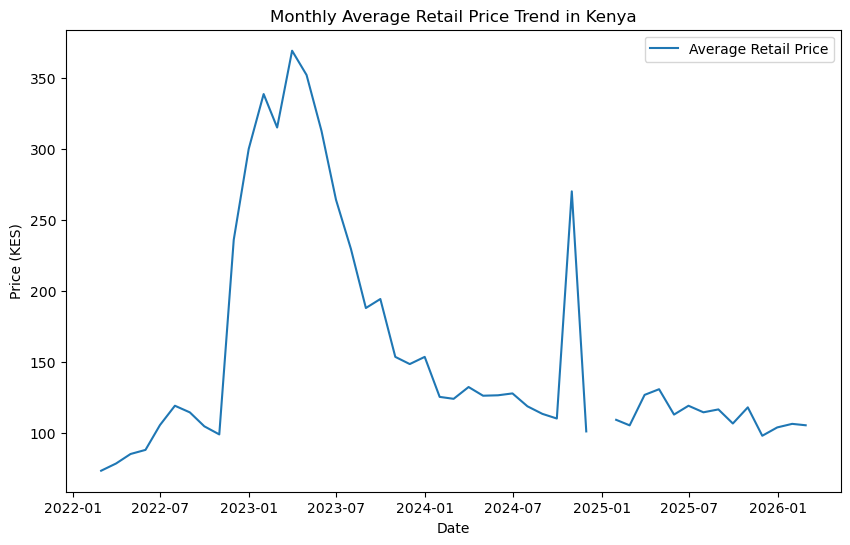

In [29]:
# Resampling to monthly frequency
# Aggregating by taking the mean retail price per day/month
ts_data = data.set_index('Date').resample('M')['Retail'].mean()
plt.figure(figsize=(10, 6))
plt.plot(ts_data, label='Average Retail Price')
plt.title('Monthly Average Retail Price Trend in Kenya')
plt.xlabel('Date')
plt.ylabel('Price (KES)')
plt.legend()
plt.show()


The average retail price exhibits an initial period of high volatility characterized by a sharp surge and subsequent correction. Then the prices stabilize at a lower level, with occasional short-lived shocks that do not persist. This indicates a market that experienced a significant disruption but later achieved relative equilibrium.

In [30]:
data['Date'] = pd.to_datetime(data['Date'])
data['Month'] = data['Date'].dt.month

#### Grouping Commodity, County, and Month to get average retail price

In [31]:
monthly_data = data.groupby([
    'Commodity', 
    'County', 
    pd.Grouper(key='Date', freq='MS')
])['Retail'].mean().reset_index()

#### What is the trend of the average retail price over time for Dry maize, Red Irish Potatoes and wheat?

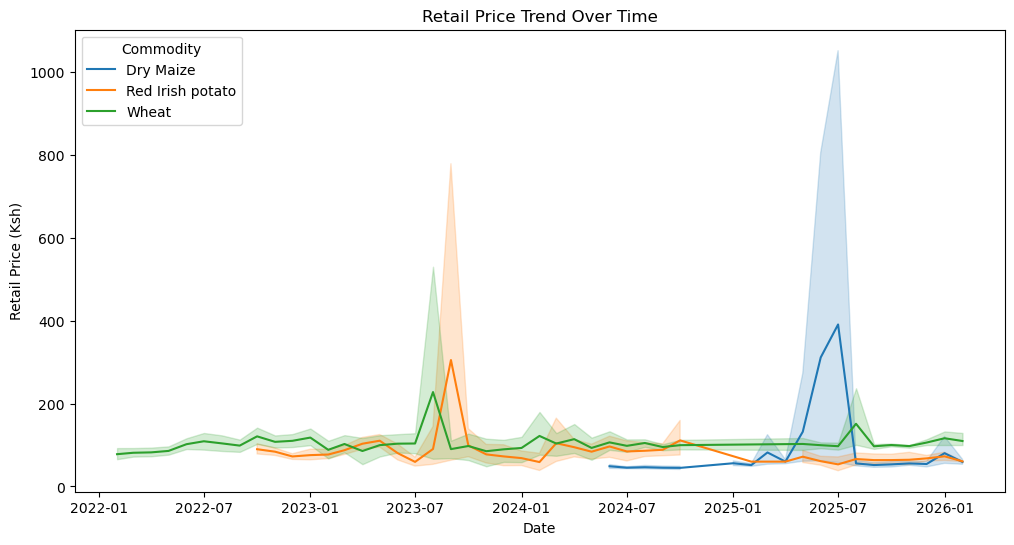

In [32]:
# Visualizing price trends for key commodities
key_commodities = ["Red Irish potato","Wheat","Dry Maize"]
subset = monthly_data[monthly_data['Commodity'].isin(key_commodities)]
plt.figure(figsize=(12,6))
sns.lineplot(data=subset, x='Date', y='Retail', hue='Commodity')
plt.title("Retail Price Trend Over Time")
plt.xlabel("Date")
plt.ylabel("Retail Price (Ksh)")
plt.show()

Prices fluctuate over time, with Dry Maize changing more sharply than Wheat and Red Irish Potato. The three generally move in similar directions. Sudden spikes may reflect supply disruptions or seasonal changes.

#### What are the top 5 commodities by average retail price?

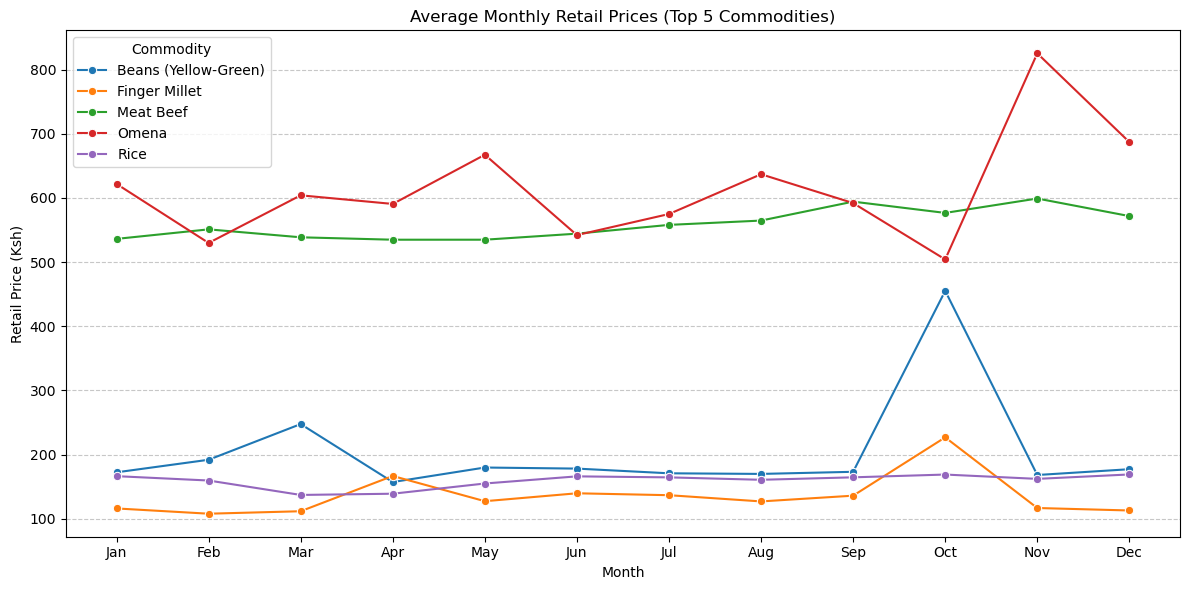

In [33]:
# Identifying top 5 commodities by average retail price
top_5 = monthly_data.groupby('Commodity')['Retail'].mean().sort_values(ascending=False).head(5).index
seasonal_pattern = data.groupby(['Commodity', 'Month'])['Retail'].mean().reset_index()
seasonal_subset = seasonal_pattern[
    seasonal_pattern['Commodity'].isin(top_5)
]

plt.figure(figsize=(12,6))
sns.lineplot(data=seasonal_subset, x='Month', y='Retail', hue='Commodity', marker='o')
plt.title("Average Monthly Retail Prices (Top 5 Commodities)")
plt.xlabel("Month")
plt.xticks(ticks=range(1,13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(axis='y', linestyle='--', alpha=0.7)  
plt.ylabel("Retail Price (Ksh)")

plt.tight_layout()
plt.show()

***Retail prices of staple commodities show clear seasonal patterns, with October emerging as a high-volatility period, while animal products—especially omena—exhibit greater price instability compared to cereals.***

MODELLING

In [34]:
monthly_data = data.groupby(
    ['Commodity', pd.Grouper(key='Date', freq='MS')]
)[['Retail', 'Wholesale']].mean().reset_index()


In [35]:
commodities = monthly_data['Commodity'].unique()

sarima_results = {}
sarima_models = {}

for com in commodities:
    
    df_com = monthly_data[monthly_data['Commodity'] == com].sort_values('Date')
    ts = df_com['Retail']

    if len(ts) < 24:   # need enough data for seasonal model
        continue

    # Train-test split
    split = int(len(ts) * 0.8)
    train, test = ts[:split], ts[split:]

    try:
        # Building SARIMA model
        model = SARIMAX(
            train,
            order=(1,1,1),
            seasonal_order=(1,1,1,12),
            enforce_stationarity=False,
            enforce_invertibility=False
        )

        model_fit = model.fit(disp=False)

        # Predictions
        forecast = model_fit.forecast(steps=len(test))

        # Evaluating
        mae = mean_absolute_error(test, forecast)
        rmse = np.sqrt(mean_squared_error(test, forecast))

        # Storing results
        sarima_results[com] = {"MAE": mae, "RMSE": rmse}
        sarima_models[com] = model_fit

        print(f"{com} → SARIMA MAE: {mae:.2f}, RMSE: {rmse:.2f}")

    except:
        continue

Banana (Cooking) → SARIMA MAE: 821.92, RMSE: 1270.19
Banana (Ripening) → SARIMA MAE: 264.75, RMSE: 431.79
Beans (Yellow-Green) → SARIMA MAE: 191.99, RMSE: 388.31
Beans Red Haricot (Wairimu) → SARIMA MAE: 162.61, RMSE: 311.21
Cowpea leaves (Kunde) → SARIMA MAE: 26.88, RMSE: 29.18
Cowpeas → SARIMA MAE: 120.48, RMSE: 166.55
Finger Millet → SARIMA MAE: 136.85, RMSE: 261.20
Meat Beef → SARIMA MAE: 173.25, RMSE: 194.56
Omena → SARIMA MAE: 113.12, RMSE: 150.49
Red Irish potato → SARIMA MAE: 95.15, RMSE: 154.46
Spinach → SARIMA MAE: 114.53, RMSE: 127.30
Wheat → SARIMA MAE: 36.83, RMSE: 57.69


In [36]:
commodities = monthly_data['Commodity'].unique()

sarima_wholesale_results = {}
sarima_wholesale_models = {}

for com in commodities:
    
    df_com = monthly_data[monthly_data['Commodity'] == com].sort_values('Date')
    ts = df_com['Wholesale']

    if len(ts) < 24:   
        continue

    # Train-test split
    split = int(len(ts) * 0.8)
    train, test = ts[:split], ts[split:]

    try:
        # Building SARIMA model
        model = SARIMAX(
            train,
            order=(1,1,1),
            seasonal_order=(1,1,1,12),
            enforce_stationarity=False,
            enforce_invertibility=False
        )

        model_fit = model.fit(disp=False)

        # Predictions
        forecast = model_fit.forecast(steps=len(test))

        # Evaluating
        mae = mean_absolute_error(test, forecast)
        rmse = np.sqrt(mean_squared_error(test, forecast))

        # Storing results
        sarima_wholesale_results[com] = {"MAE": mae, "RMSE": rmse}
        sarima_wholesale_models[com] = model_fit

        print(f"{com} → SARIMA Wholesale MAE: {mae:.2f}, RMSE: {rmse:.2f}")

    except:
        continue

Banana (Cooking) → SARIMA Wholesale MAE: 24.09, RMSE: 35.17
Banana (Ripening) → SARIMA Wholesale MAE: 21.40, RMSE: 24.14
Beans (Yellow-Green) → SARIMA Wholesale MAE: 35.30, RMSE: 49.78
Beans Red Haricot (Wairimu) → SARIMA Wholesale MAE: 87.49, RMSE: 129.81
Cowpea leaves (Kunde) → SARIMA Wholesale MAE: 26.97, RMSE: 28.27
Cowpeas → SARIMA Wholesale MAE: 12.38, RMSE: 21.72
Finger Millet → SARIMA Wholesale MAE: 18.25, RMSE: 21.39
Meat Beef → SARIMA Wholesale MAE: 5026.07, RMSE: 8690.19
Omena → SARIMA Wholesale MAE: 235.39, RMSE: 311.10
Red Irish potato → SARIMA Wholesale MAE: 11.86, RMSE: 13.62
Spinach → SARIMA Wholesale MAE: 16.96, RMSE: 18.69
Wheat → SARIMA Wholesale MAE: 12.17, RMSE: 18.20


### These SARIMA models act as a baseline since it has high mean absolute errors and root mean squared errors and also we do not have enough data to capture seasonal trends for all commodities.

In [37]:
commodities = monthly_data['Commodity'].unique()

lstm_results = {}
lstm_models = {}

for com in commodities:
    df_com = monthly_data[monthly_data['Commodity'] == com].sort_values('Date')
    ts = df_com['Retail'].values

    if len(ts) < 12:
        continue

    # Scaling data
    scaler = MinMaxScaler()
    ts_scaled = scaler.fit_transform(ts.reshape(-1, 1))

    # Creating sequences
    X, y = [], []
    sequence_length = 3

    for i in range(len(ts_scaled) - sequence_length):
        X.append(ts_scaled[i:i + sequence_length])
        y.append(ts_scaled[i + sequence_length])

    # Converting to numpy AFTER building sequences
    X = np.array(X)
    y = np.array(y)

    # Train and testing the data
    split = int(len(X) * 0.8)
    X_train, X_test = X[:split], X[split:]
    y_train, y_test = y[:split], y[split:]

    # Building the model
    model = Sequential()
    model.add(LSTM(50, activation='relu', input_shape=(sequence_length, 1)))
    model.add(Dense(1))

    model.compile(optimizer='adam', loss='mse')

    # Training the model
    model.fit(X_train, y_train, epochs=50, batch_size=8, verbose=0)

    # Predictions
    y_pred = model.predict(X_test, verbose=0)

    # Inverse scaling
    y_test_inv = scaler.inverse_transform(y_test)
    y_pred_inv = scaler.inverse_transform(y_pred)

    # Evaluating
    mae = mean_absolute_error(y_test_inv, y_pred_inv)
    rmse = np.sqrt(mean_squared_error(y_test_inv, y_pred_inv))

    # Storing results
    lstm_results[com] = {"MAE": mae, "RMSE": rmse}
    lstm_models[com] = model

    print(f"{com} → LSTM MAE: {mae:.2f}, RMSE: {rmse:.2f}")

2026-02-24 20:45:35.888063: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


Banana (Cooking) → LSTM MAE: 38.44, RMSE: 53.78
Banana (Ripening) → LSTM MAE: 7.16, RMSE: 9.02
Beans (Yellow-Green) → LSTM MAE: 60.53, RMSE: 60.65
Beans Red Haricot (Wairimu) → LSTM MAE: 42.20, RMSE: 44.04
Cabbages → LSTM MAE: 4.83, RMSE: 5.06
Cowpea leaves (Kunde) → LSTM MAE: 5.67, RMSE: 6.30
Cowpeas → LSTM MAE: 20.91, RMSE: 22.07
Dry Maize → LSTM MAE: 12.40, RMSE: 19.74
Dry Onions → LSTM MAE: 2.67, RMSE: 3.07
Finger Millet → LSTM MAE: 25.48, RMSE: 25.72
Kales/Sukuma Wiki → LSTM MAE: 4.79, RMSE: 5.31
Maize Flour → LSTM MAE: 2.49, RMSE: 2.53
Meat Beef → LSTM MAE: 31.43, RMSE: 39.13
Omena → LSTM MAE: 75.02, RMSE: 84.19
Red Irish potato → LSTM MAE: 10.57, RMSE: 11.52
Rice → LSTM MAE: 3.40, RMSE: 3.56
Spinach → LSTM MAE: 15.10, RMSE: 15.15
Wheat → LSTM MAE: 25.10, RMSE: 50.34


The LSTM model performed well for stable commodities like onions, rice, and maize flour, showing low prediction errors. However, it struggled with more volatile items such as omena, beans, and wheat, where sudden price fluctuations likely affected accuracy. Overall, the model works better for consistent price patterns than highly unstable markets.

In [38]:
commodities = monthly_data['Commodity'].unique()

lstm_wholesale_results = {}
lstm_wholesale_models = {}

for com in commodities:
    df_com = monthly_data[monthly_data['Commodity'] == com].sort_values('Date')
    ts = df_com['Wholesale'].values   
    

    if len(ts) < 12:
        continue

    # Scaling data
    scaler = MinMaxScaler()
    ts_scaled = scaler.fit_transform(ts.reshape(-1, 1))

    # Creating sequences
    X, y = [], []
    sequence_length = 3

    for i in range(len(ts_scaled) - sequence_length):
        X.append(ts_scaled[i:i + sequence_length])
        y.append(ts_scaled[i + sequence_length])

    X = np.array(X)
    y = np.array(y)

    # Train-test split
    split = int(len(X) * 0.8)
    X_train, X_test = X[:split], X[split:]
    y_train, y_test = y[:split], y[split:]

    # Building  model
    model = Sequential()
    model.add(LSTM(50, activation='relu', input_shape=(sequence_length, 1)))
    model.add(Dense(1))

    model.compile(optimizer='adam', loss='mse')

    # Train
    model.fit(X_train, y_train, epochs=50, batch_size=8, verbose=0)

    # Predict
    y_pred = model.predict(X_test, verbose=0)

    # Inverse scaling
    y_test_inv = scaler.inverse_transform(y_test)
    y_pred_inv = scaler.inverse_transform(y_pred)

    # Evaluating predictions
    mae = mean_absolute_error(y_test_inv, y_pred_inv)
    rmse = np.sqrt(mean_squared_error(y_test_inv, y_pred_inv))

    # Store results
    lstm_wholesale_results[com] = {"MAE": mae, "RMSE": rmse}
    lstm_wholesale_models[com] = model

    print(f"{com} → LSTM Wholesale MAE: {mae:.2f}, RMSE: {rmse:.2f}")

Banana (Cooking) → LSTM Wholesale MAE: 17.14, RMSE: 27.29
Banana (Ripening) → LSTM Wholesale MAE: 10.91, RMSE: 12.10
Beans (Yellow-Green) → LSTM Wholesale MAE: 5.00, RMSE: 5.64
Beans Red Haricot (Wairimu) → LSTM Wholesale MAE: 10.62, RMSE: 10.89
Cabbages → LSTM Wholesale MAE: 4.83, RMSE: 5.60
Cowpea leaves (Kunde) → LSTM Wholesale MAE: 8.87, RMSE: 8.99
Cowpeas → LSTM Wholesale MAE: 6.20, RMSE: 7.70
Dry Maize → LSTM Wholesale MAE: 27.35, RMSE: 37.72
Dry Onions → LSTM Wholesale MAE: 2.59, RMSE: 2.72
Finger Millet → LSTM Wholesale MAE: 8.68, RMSE: 10.55
Kales/Sukuma Wiki → LSTM Wholesale MAE: 5.85, RMSE: 6.07
Maize Flour → LSTM Wholesale MAE: 1.86, RMSE: 1.86
Meat Beef → LSTM Wholesale MAE: 15.69, RMSE: 17.55
Omena → LSTM Wholesale MAE: 56.68, RMSE: 63.53
Red Irish potato → LSTM Wholesale MAE: 10.49, RMSE: 11.00
Rice → LSTM Wholesale MAE: 7.66, RMSE: 8.09
Spinach → LSTM Wholesale MAE: 7.66, RMSE: 7.88
Wheat → LSTM Wholesale MAE: 7.67, RMSE: 8.29


The LSTM model performs well for commodities with stable wholesale prices, such as Maize Flour, Dry Onions, and Rice, showing low MAE and RMSE. It struggles with more volatile items like Omena and Meat Beef, where errors are higher. Overall, the model captures consistent trends effectively. This suggests it is better suited for commodities with predictable price patterns.

In [39]:
# Getting unique commodities
commodities = monthly_data['Commodity'].unique()

# creating a dictionaries to store the results and models
xgb_results = {}
xgb_models = {}

for com in commodities:
    # Filtering data for the current commodity
    df_com = monthly_data[monthly_data['Commodity'] == com].sort_values('Date')
    
    # Using Retail price as the target
    ts = df_com['Retail'].values
    
    if len(ts) < 12:
        continue
    
    # Creating lag features
    df_feat = pd.DataFrame({'y': ts})
    for lag in range(1, 4):  # lag_1, lag_2, lag_3
        df_feat[f'lag_{lag}'] = df_feat['y'].shift(lag)
    df_feat.dropna(inplace=True)
    
    # Train-test split using	80% for training and 20% for testing
    train_size = int(len(df_feat) * 0.8)
    train, test = df_feat[:train_size], df_feat[train_size:]
    X_train = train.drop('y', axis=1)
    y_train = train['y']
    X_test = test.drop('y', axis=1)
    y_test = test['y']
    
    # Training the model
    model = XGBRegressor(objective='reg:squarederror', n_estimators=100)
    model.fit(X_train, y_train)
    
    # Predictions
    y_pred = model.predict(X_test)
    
    # Evaluation
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    
    # Storing the results and the model
    xgb_results[com] = {"MAE": mae, "RMSE": rmse}
    xgb_models[com] = model
    print(f"{com} → XGBoost MAE: {mae:.2f}, RMSE: {rmse:.2f}")

Banana (Cooking) → XGBoost MAE: 34.57, RMSE: 52.09
Banana (Ripening) → XGBoost MAE: 6.15, RMSE: 7.99
Beans (Yellow-Green) → XGBoost MAE: 6.76, RMSE: 7.68
Beans Red Haricot (Wairimu) → XGBoost MAE: 169.51, RMSE: 332.26
Cabbages → XGBoost MAE: 5.38, RMSE: 7.80
Cowpea leaves (Kunde) → XGBoost MAE: 4.96, RMSE: 5.93
Cowpeas → XGBoost MAE: 8.17, RMSE: 9.69
Dry Maize → XGBoost MAE: 18.99, RMSE: 25.99
Dry Onions → XGBoost MAE: 14.22, RMSE: 15.43
Finger Millet → XGBoost MAE: 105.66, RMSE: 166.65
Kales/Sukuma Wiki → XGBoost MAE: 2.05, RMSE: 2.19
Maize Flour → XGBoost MAE: 6.82, RMSE: 7.09
Meat Beef → XGBoost MAE: 67.75, RMSE: 73.64
Omena → XGBoost MAE: 99.99, RMSE: 107.39
Red Irish potato → XGBoost MAE: 22.59, RMSE: 24.03
Rice → XGBoost MAE: 6.03, RMSE: 6.92
Spinach → XGBoost MAE: 3.20, RMSE: 3.38
Wheat → XGBoost MAE: 21.96, RMSE: 48.08


XGBoost predicted retail prices well for most commodities like Sukuma Wiki, Spinach, Cowpea Leaves, Rice, and Cabbages, showing it captures stable price patterns effectively, though highly volatile items like Beans Red Haricot, Omena, and Meat Beef had higher errors.

In [40]:
forecast_steps = 6  # months ahead
lag_n = 3  # number of lag features

for com in commodities:

    if com not in xgb_models:
        continue

    model = xgb_models[com]

    df_com = monthly_data[monthly_data['Commodity'] == com].copy()
    df_com = df_com.sort_values('Date')
    df_com = df_com.set_index('Date')

    ts = df_com['Retail']

    # Recreating the lag features
    df_feat = pd.DataFrame({'y': ts})
    for lag in range(1, lag_n + 1):
        df_feat[f'lag_{lag}'] = df_feat['y'].shift(lag)
    df_feat.dropna(inplace=True)
    X = df_feat.drop(columns=['y'])

    # Last known lag values
    last_known = X.iloc[-1].values
    lag_cols = X.columns

    future_preds = []
    future_dates = []

    last_date = df_com.index[-1]

    for i in range(forecast_steps):
        pred_df = pd.DataFrame([last_known], columns=lag_cols)
        pred = model.predict(pred_df)[0]
        future_preds.append(pred)

        # Updating lag features for next prediction
        last_known = np.roll(last_known, -1)
        last_known[-1] = pred

        # Computing next month-end date
        next_date = last_date + MonthEnd(i+1)
        future_dates.append(next_date)

    # Forecasting DataFrame
    forecast_df = pd.DataFrame({
        "Date": future_dates,
        "Forecasted_Retail": future_preds
    })

    print(f"Next {forecast_steps} months forecast for {com} (XGBoost Retail):")
    print(forecast_df, "\n")

Next 6 months forecast for Banana (Cooking) (XGBoost Retail):
        Date  Forecasted_Retail
0 2026-02-28          43.209526
1 2026-03-31          54.995323
2 2026-04-30          38.556942
3 2026-05-31          59.247234
4 2026-06-30          52.337559
5 2026-07-31          53.759521 

Next 6 months forecast for Banana (Ripening) (XGBoost Retail):
        Date  Forecasted_Retail
0 2026-02-28          63.535000
1 2026-03-31          59.271446
2 2026-04-30          67.256187
3 2026-05-31          64.809967
4 2026-06-30          64.485893
5 2026-07-31          68.956871 

Next 6 months forecast for Beans (Yellow-Green) (XGBoost Retail):
        Date  Forecasted_Retail
0 2026-02-28         181.052948
1 2026-03-31         178.281342
2 2026-04-30         165.829300
3 2026-05-31         175.284180
4 2026-06-30         178.281418
5 2026-07-31         163.840759 

Next 6 months forecast for Beans Red Haricot (Wairimu) (XGBoost Retail):
        Date  Forecasted_Retail
0 2026-02-28         118.0

In [41]:
lag_n = 3  # number of lag features
commodities = monthly_data['Commodity'].unique()
xgb_wholesale_results = {}
xgb_wholesale_models = {}

for com in commodities:  
    df_com = monthly_data[monthly_data['Commodity'] == com].copy()
    df_com = df_com.sort_values('Date')
    df_com = df_com.set_index('Date')

    ts = df_com['Wholesale']

    if len(ts) < 12:  # skips small datasets
        continue  

    # Creating lag features
    df_feat = pd.DataFrame({'y': ts})
    for lag in range(1, lag_n + 1):
        df_feat[f'lag_{lag}'] = df_feat['y'].shift(lag)
    df_feat.dropna(inplace=True)

    X = df_feat.drop(columns=['y'])
    y = df_feat['y']

    # Train-test split
    split_idx = int(len(X) * 0.8)
    X_train, X_test = X.iloc[:split_idx], X.iloc[split_idx:]
    y_train, y_test = y.iloc[:split_idx], y.iloc[split_idx:]

    # Fitting the model
    model = XGBRegressor(objective='reg:squarederror', n_estimators=100, learning_rate=0.1)
    model.fit(X_train, y_train)

    # Predictions
    y_pred = model.predict(X_test)
    xgb_wholesale_models[com] = model

    # Metrics
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    xgb_wholesale_results[com] = {"MAE": mae, "RMSE": rmse}

    print(f"{com} → XGBoost MAE: {mae:.2f}, RMSE: {rmse:.2f}")

Banana (Cooking) → XGBoost MAE: 19.23, RMSE: 29.08
Banana (Ripening) → XGBoost MAE: 11.26, RMSE: 16.31
Beans (Yellow-Green) → XGBoost MAE: 4.92, RMSE: 5.47
Beans Red Haricot (Wairimu) → XGBoost MAE: 27.05, RMSE: 30.91
Cabbages → XGBoost MAE: 6.43, RMSE: 7.34
Cowpea leaves (Kunde) → XGBoost MAE: 2.71, RMSE: 3.15
Cowpeas → XGBoost MAE: 17.06, RMSE: 23.48
Dry Maize → XGBoost MAE: 29.09, RMSE: 39.28
Dry Onions → XGBoost MAE: 7.21, RMSE: 7.88
Finger Millet → XGBoost MAE: 7.20, RMSE: 8.00
Kales/Sukuma Wiki → XGBoost MAE: 3.80, RMSE: 4.72
Maize Flour → XGBoost MAE: 12.00, RMSE: 12.45
Meat Beef → XGBoost MAE: 17.83, RMSE: 20.17
Omena → XGBoost MAE: 99.92, RMSE: 112.96
Red Irish potato → XGBoost MAE: 13.66, RMSE: 14.09
Rice → XGBoost MAE: 4.44, RMSE: 5.26
Spinach → XGBoost MAE: 10.86, RMSE: 10.93
Wheat → XGBoost MAE: 9.53, RMSE: 12.80


XGBoost demonstrated strong performance in forecasting wholesale prices for most commodities, particularly Cowpea Leaves, Beans (Yellow-Green), Rice, Sukuma Wiki, and Finger Millet, where errors were relatively low. This suggests the model effectively captured wholesale market patterns, with only a few commodities like Omena showing significantly higher prediction errors.

In [42]:
from pandas.tseries.offsets import MonthEnd

forecast_steps = 6  # months ahead

for com in commodities:

    if com not in xgb_wholesale_models:
        continue

    model = xgb_wholesale_models[com]

    df_com = monthly_data[monthly_data['Commodity'] == com].copy()
    df_com = df_com.sort_values('Date')
    df_com = df_com.set_index('Date')

    ts = df_com['Wholesale']

    # Recreating lag features
    df_feat = pd.DataFrame({'y': ts})
    for lag in range(1, lag_n + 1):
        df_feat[f'lag_{lag}'] = df_feat['y'].shift(lag)
    df_feat.dropna(inplace=True)
    X = df_feat.drop(columns=['y'])

    # Last known lag values
    last_known = X.iloc[-1].values
    lag_cols = X.columns

    future_preds = []
    future_dates = []

    last_date = df_com.index[-1]

    for i in range(forecast_steps):
        pred_df = pd.DataFrame([last_known], columns=lag_cols)
        pred = model.predict(pred_df)[0]
        future_preds.append(pred)

        # Updating lag features for next prediction
        last_known = np.roll(last_known, -1)
        last_known[-1] = pred

        # Computing next month date
        next_date = last_date + MonthEnd(i+1)
        future_dates.append(next_date)

    # Showing forecast with actual dates
    forecast_df = pd.DataFrame({
        "Date": future_dates,
        "Forecasted_Wholesale": future_preds
    })

    print(f"Next {forecast_steps} months forecast for {com}:")
    print(forecast_df, "\n")

Next 6 months forecast for Banana (Cooking):
        Date  Forecasted_Wholesale
0 2026-02-28             49.165173
1 2026-03-31             36.291664
2 2026-04-30             35.941147
3 2026-05-31             44.918797
4 2026-06-30             38.500038
5 2026-07-31             34.305836 

Next 6 months forecast for Banana (Ripening):
        Date  Forecasted_Wholesale
0 2026-02-28             41.535271
1 2026-03-31             67.306152
2 2026-04-30             39.789852
3 2026-05-31             67.306152
4 2026-06-30             55.568924
5 2026-07-31             50.950481 

Next 6 months forecast for Beans (Yellow-Green):
        Date  Forecasted_Wholesale
0 2026-02-28            136.582993
1 2026-03-31            136.582993
2 2026-04-30            136.582993
3 2026-05-31            136.582993
4 2026-06-30            136.582993
5 2026-07-31            136.582993 

Next 6 months forecast for Beans Red Haricot (Wairimu):
        Date  Forecasted_Wholesale
0 2026-02-28            128.

### We now have a working model that is the XGBoost Regressor and its forecasts.

In [44]:
import joblib
import os
import re

os.makedirs("saved_models/xgb", exist_ok=True)

for com, model in xgb_models.items():
   
    safe_name = re.sub(r'[^\w\-]', '_', com)  
    model_path = f"saved_models/xgb/{safe_name}_xgb.pkl"
    joblib.dump(model, model_path)

print("XGBoost models saved!")

XGBoost models saved!


In [47]:


import os
import re

os.makedirs("saved_models/lstm", exist_ok=True)

for com, model in lstm_models.items():
    safe_name = re.sub(r'[^\w\-]', '_', com)
    model_path = f"saved_models/lstm/{safe_name}_lstm.keras"
    model.save(model_path)

print("LSTM models saved!")

LSTM models saved!


In [49]:
os.makedirs("saved_models/sarima", exist_ok=True)

for com, model in sarima_models.items():
    safe_name = re.sub(r'[^\w\-]', '_', com)
    model_path = f"saved_models/sarima/{safe_name}_sarima.pkl"
    joblib.dump(model, model_path)

print("SARIMA models saved!")

SARIMA models saved!


In [56]:

os.makedirs("saved_models/xgb_wholesale", exist_ok=True)
for com, model in xgb_wholesale_models.items():
    safe_name = re.sub(r'[^\w\-]', '_', com)
    joblib.dump(model, f"saved_models/xgb_wholesale/{safe_name}_xgb_wholesale.pkl")
print("XGBoost Wholesale saved!")


os.makedirs("saved_models/lstm_wholesale", exist_ok=True)
for com, model in lstm_wholesale_models.items():
    safe_name = re.sub(r'[^\w\-]', '_', com)
    model.save(f"saved_models/lstm_wholesale/{safe_name}_lstm_wholesale.keras")
print("LSTM Wholesale saved!")


os.makedirs("saved_models/sarima_wholesale", exist_ok=True)
for com, model in sarima_wholesale_models.items():
    safe_name = re.sub(r'[^\w\-]', '_', com)
    joblib.dump(model, f"saved_models/sarima_wholesale/{safe_name}_sarima_wholesale.pkl")
print("SARIMA Wholesale saved!")

XGBoost Wholesale saved!
LSTM Wholesale saved!
SARIMA Wholesale saved!


In [ ]:
import os
import re

for f in os.listdir('saved_models/xgb'):
    if '__' in f:
        os.remove(f'saved_models/xgb/{f}')
        print(f"Deleted: {f}")

print(f"Remaining: {len(os.listdir('saved_models/xgb'))} files")

In [59]:
print(f"LSTM — Expected: {len(lstm_models)}, Saved: {len(os.listdir('saved_models/lstm'))}")
print(f"SARIMA — Expected: {len(sarima_models)}, Saved: {len(os.listdir('saved_models/sarima'))}")
print(f"XGBoost — Expected: {len(xgb_models)}, Saved: {len(os.listdir('saved_models/xgb'))}")
print(f"XGBoost Wholesale: {len(os.listdir('saved_models/xgb_wholesale'))} files")
print(f"LSTM Wholesale: {len(os.listdir('saved_models/lstm_wholesale'))} files")
print(f"SARIMA Wholesale: {len(os.listdir('saved_models/sarima_wholesale'))} files")

LSTM — Expected: 18, Saved: 18
SARIMA — Expected: 12, Saved: 12
XGBoost — Expected: 18, Saved: 18
XGBoost Wholesale: 18 files
LSTM Wholesale: 18 files
SARIMA Wholesale: 12 files


***CONCLUSION***

The data corroborates the hypothesis that information asymmetry is not merely a theoretical inefficiency — it is a measurable structural cost. With Omena exhibiting extreme price volatility, Beans (Yellow-Green) generating a 46.9% margin against backdrop uncertainty, and supply concentration creating predictable shock pathways, the cost of operating without predictive intelligence compounds at every layer of the value chain. Farmers selling at suboptimal times, traders over-procuring before price corrections, and consumers absorbing markup volatility they cannot anticipate each represent a quantifiable welfare loss that a functioning market intelligence system can materially reduce.

For commodities characterized by stable, trend-driven price behavior — including Rice, Maize Flour, Dry Onions, Sukuma Wiki, Cabbages, Spinach, and Cowpea Leaves — the XGBoost and LSTM models demonstrate error margins well within the commercially actionable threshold. These commodities collectively represent a significant share of daily household consumption and trader inventory decisions, meaning the case for immediate deployment of forecasting tools for this segment is both analytically sound and operationally ready.

Commodities such as Omena, Beans Red Haricot, Finger Millet, and Wheat — where model errors remain elevated — cannot be reliably served by any single algorithmic approach at this stage. This is not a modelling failure; it reflects the genuine structural complexity of these markets, where supply shocks, informal trade flows, and sentiment-driven demand create non-linear dynamics that historical price data alone cannot fully encode. A hybrid architecture combining predictive models with curated external intelligence inputs is the strategically appropriate response for this commodity tier.

Finally, the finding that a single county (Bungoma) and a single market (Chwele) account for the majority of commodity supply is arguably the most consequential structural insight to emerge from this engagement. No forecasting model, however sophisticated, can fully hedge the tail risk of a disruption concentrated at this scale — elevating this from a data science output to a policy-level imperative. The diversification of supply sourcing is a prerequisite for sustainable market stability, and the quantitative evidence base to advocate for it at the highest levels of government now exists.

**Recommendation**

The immediate priority is deploying the XGBoost models into a mobile-first dashboard or USSD-based interface, delivering rolling 6-month price forecasts refreshed monthly as new KAMIS data is ingested. Trans-Nzoia, Kirinyaga, and Nairobi are the recommended pilot counties given their supply volume dominance in the dataset.
Model accuracy must be sustained through a monthly automated retraining pipeline with performance monitoring protocols. Alongside this, a data governance initiative targeting the supply volume field is critical — the 17,775+ null entries pre-imputation represent significant untapped predictive value that improved field-level data capture can unlock.

For high-variance commodities such as Omena, Beans Red Haricot, and Finger Millet, a volatility risk index incorporating price variance, supply concentration, and seasonal stress indicators should complement the existing forecast models. Integration of external signals — satellite rainfall indices and COMESA cross-border trade flows — would further sharpen accuracy for these structurally complex commodities.

At the policy level, the supply concentration findings should be formally presented to the Ministry of Agriculture to underpin a supply chain diversification program targeting agri-finance access and infrastructure investment beyond Bungoma and Chwele. A cross-functional Market Intelligence Governance Committee spanning the Ministry, county governments, KAMIS leadership, and private sector actors should then be constituted to steward the system's long-term performance and expansion.